In [3]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot

In [4]:
df_full = pd.read_csv('US_Accidents_Dec19.csv')

In [90]:
# Traffic_signal
# Weather_Condition
# Wind_Speed(mph)
# Visibility(mi)
# Temparature(F)
# Severity

In [62]:
# list all the columns in the data set
df_full['Start_Time'] = pd.to_datetime(df_full['Start_Time'], format="")
df_full = df_full.dropna(subset = ['Visibility(mi)','Traffic_Signal', 'Wind_Speed(mph)','Weather_Condition','Temperature(F)', 'Severity'])
df = df_full.loc[df_full['Start_Time'] > '2019-01-01']

In [7]:
visibility = df['Visibility(mi)']#.dropna()#.astype(int)
df['visibility'] = visibility

C:\Users\SAgrawal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
hist = thinkstats2.Hist(visibility)
hist

Hist({10.0: 708798, 7.0: 26716, 9.0: 23395, 8.0: 18932, 5.0: 16910, 6.0: 15608, 2.0: 14289, 4.0: 14142, 3.0: 14088, 1.0: 11350, 0.5: 4103, 2.5: 2512, 0.25: 2381, 0.75: 1957, 1.5: 1882, 0.8: 1597, 0.2: 1576, 1.8: 1277, 1.2: 1123, 30.0: 781, 15.0: 710, 20.0: 667, 0.0: 586, 40.0: 390, 13.0: 349, 50.0: 340, 0.12: 246, 0.1: 168, 25.0: 153, 45.0: 85, 70.0: 78, 60.0: 64, 0.06: 39, 12.0: 39, 0.63: 32, 2.8: 30, 0.38: 27, 0.4: 25, 80.0: 25, 35.0: 25, 0.6: 24, 2.2: 23, 0.88: 20, 0.9: 13, 1.1: 11, 1.9: 9, 1.4: 8, 1.6: 7, 5.5: 5, 90.0: 5, 3.5: 4, 0.19: 4, 14.0: 3, 76.0: 3, 75.0: 2, 101.0: 1, 16.0: 1, 19.0: 1, 130.0: 1, 110.0: 1})

In [9]:
hist.Values()

dict_keys([10.0, 7.0, 9.0, 8.0, 5.0, 6.0, 2.0, 4.0, 3.0, 1.0, 0.5, 2.5, 0.25, 0.75, 1.5, 0.8, 0.2, 1.8, 1.2, 30.0, 15.0, 20.0, 0.0, 40.0, 13.0, 50.0, 0.12, 0.1, 25.0, 45.0, 70.0, 60.0, 0.06, 12.0, 0.63, 2.8, 0.38, 0.4, 80.0, 35.0, 0.6, 2.2, 0.88, 0.9, 1.1, 1.9, 1.4, 1.6, 5.5, 90.0, 3.5, 0.19, 14.0, 76.0, 75.0, 101.0, 16.0, 19.0, 130.0, 110.0])

In [10]:
for v, freq in hist.Smallest(10):
    print(v, freq)

0.0 586
0.06 39
0.1 168
0.12 246
0.19 4
0.2 1576
0.25 2381
0.38 27
0.4 25
0.5 4103


In [11]:
for v, freq in hist.Largest(10):
    print(v, freq)

130.0 1
110.0 1
101.0 1
90.0 5
80.0 25
76.0 3
75.0 2
70.0 78
60.0 64
50.0 340


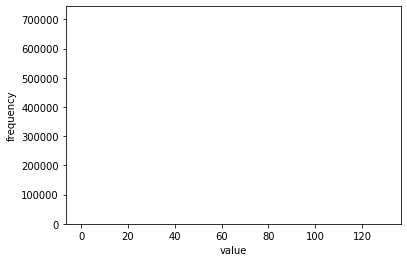

<Figure size 576x432 with 0 Axes>

In [12]:
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

In [13]:
visibility.mean()

9.101511466910514

In [14]:
visibility.var()

7.942416344406279

In [15]:
visibility.std()

2.8182292923760266

In [16]:
weather = df['Weather_Condition']#.dropna()

In [17]:
weather_hist = thinkstats2.Hist(weather)

In [18]:
print(weather_hist)

Hist({'Fair': 322451, 'Mostly Cloudy': 124217, 'Cloudy': 111630, 'Partly Cloudy': 97296, 'Clear': 48947, 'Light Rain': 45448, 'Overcast': 44845, 'Light Snow': 14870, 'Scattered Clouds': 12262, 'Fog': 11203, 'Rain': 10773, 'Haze': 8206, 'Heavy Rain': 3938, 'Fair / Windy': 3580, 'Light Drizzle': 3316, 'T-Storm': 2094, 'Thunder in the Vicinity': 2090, 'Cloudy / Windy': 2023, 'Mostly Cloudy / Windy': 1959, 'Light Rain with Thunder': 1891, 'Snow': 1688, 'Thunder': 1585, 'Partly Cloudy / Windy': 1266, 'Heavy T-Storm': 1231, 'Light Rain / Windy': 998, 'Wintry Mix': 791, 'Light Freezing Rain': 748, 'Drizzle': 603, 'Patches of Fog': 587, 'Smoke': 549, 'Mist': 459, 'Light Snow / Windy': 442, 'Light Freezing Drizzle': 371, 'Heavy Snow': 342, 'Shallow Fog': 316, 'Rain / Windy': 284, 'Showers in the Vicinity': 251, 'N/A Precipitation': 165, 'Light Freezing Fog': 154, 'Heavy Rain / Windy': 141, 'Heavy T-Storm / Windy': 138, 'T-Storm / Windy': 126, 'Light Thunderstorms and Rain': 124, 'Blowing Snow':

In [19]:
def Process_Weather(weather):
    weather2 = []
    for w in weather:
        if w in ['Fair', 'Mostly Cloudy', 'Cloudy', 'Partly Cloudy', 'Clear', 'Overcast']:
            weather2.append(w)
        else:
            weather2.append('Others')
    return weather2
 
weather2 = Process_Weather(weather)
df['Weather2'] = weather2
weather_hist2 = thinkstats2.Hist(weather2)
weather_hist2

C:\Users\SAgrawal\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Hist({'Fair': 322451, 'Mostly Cloudy': 124217, 'Others': 138255, 'Partly Cloudy': 97296, 'Cloudy': 111630, 'Clear': 48947, 'Overcast': 44845})

# thinkplot.Hist(weather_hist2)
thinkplot.Show(xlabel='value', ylabel='frequency')

In [21]:
weather_hist.Values()

dict_keys(['Fair', 'Mostly Cloudy', 'Cloudy', 'Partly Cloudy', 'Clear', 'Light Rain', 'Overcast', 'Light Snow', 'Scattered Clouds', 'Fog', 'Rain', 'Haze', 'Heavy Rain', 'Fair / Windy', 'Light Drizzle', 'T-Storm', 'Thunder in the Vicinity', 'Cloudy / Windy', 'Mostly Cloudy / Windy', 'Light Rain with Thunder', 'Snow', 'Thunder', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Light Rain / Windy', 'Wintry Mix', 'Light Freezing Rain', 'Drizzle', 'Patches of Fog', 'Smoke', 'Mist', 'Light Snow / Windy', 'Light Freezing Drizzle', 'Heavy Snow', 'Shallow Fog', 'Rain / Windy', 'Showers in the Vicinity', 'N/A Precipitation', 'Light Freezing Fog', 'Heavy Rain / Windy', 'Heavy T-Storm / Windy', 'T-Storm / Windy', 'Light Thunderstorms and Rain', 'Blowing Snow', 'Thunderstorms and Rain', 'Thunder / Windy', 'Heavy Drizzle', 'Haze / Windy', 'Drizzle and Fog', 'Blowing Dust / Windy', 'Fog / Windy', 'Heavy Thunderstorms and Rain', 'Light Rain Shower', 'Light Ice Pellets', 'Ice Pellets', 'Snow / Windy', 'Blowi

In [22]:
signal = df['Traffic_Signal']#.dropna()

In [23]:
signal_hist = thinkstats2.Hist(signal)
print(signal_hist)

Hist({False: 743169, True: 144472})


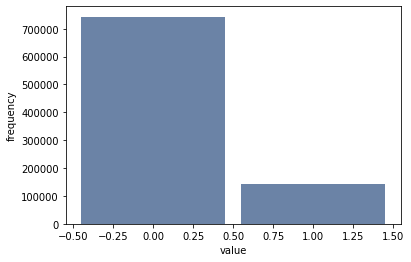

<Figure size 576x432 with 0 Axes>

In [24]:
thinkplot.Hist(signal_hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

In [25]:
wind = df['Wind_Speed(mph)']#.dropna()

In [26]:
wind_hist = thinkstats2.Hist(wind)
print(wind_hist)

Hist({0.0: 131712, 5.0: 75003, 3.0: 73180, 6.0: 71691, 7.0: 66332, 8.0: 58232, 9.0: 50833, 10.0: 41189, 12.0: 35456, 13.0: 26541, 15.0: 21675, 14.0: 21010, 4.6: 20515, 5.8: 20186, 3.5: 19314, 6.9: 18552, 8.1: 17286, 9.2: 15135, 10.4: 12382, 16.0: 11797, 11.5: 11293, 17.0: 8987, 12.7: 8872, 13.8: 7463, 18.0: 6533, 20.0: 4758, 16.1: 4601, 17.3: 3796, 21.0: 3306, 18.4: 2934, 23.0: 2579, 22.0: 2556, 19.6: 2176, 20.7: 1764, 21.9: 1329, 24.0: 1202, 25.0: 858, 24.2: 691, 26.0: 569, 25.3: 451, 28.0: 433, 26.5: 345, 29.0: 316, 27.6: 264, 28.8: 231, 30.0: 198, 31.0: 127, 29.9: 124, 31.1: 103, 2.0: 101, 32.0: 68, 32.2: 61, 34.5: 60, 33.4: 55, 33.0: 52, 35.0: 40, 38.0: 37, 1.0: 34, 35.7: 29, 36.8: 25, 36.0: 24, 37.0: 18, 2.3: 18, 39.1: 15, 1.2: 15, 40.0: 12, 40.3: 12, 41.0: 9, 39.0: 7, 42.6: 7, 47.0: 6, 41.4: 6, 230.0: 4, 44.0: 4, 44.9: 4, 67.0: 4, 58.0: 4, 175.0: 3, 142.0: 3, 169.0: 2, 43.0: 2, 45.0: 2, 113.0: 2, 46.0: 2, 161.0: 2, 255.0: 1, 110.0: 1, 116.0: 1, 54.0: 1, 47.2: 1, 53.0: 1, 52.0: 1,

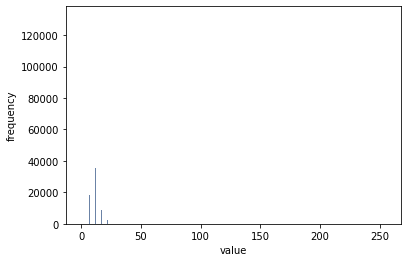

<Figure size 576x432 with 0 Axes>

In [27]:
thinkplot.Hist(wind_hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

In [28]:
wind.mean()

7.42943859059813

In [29]:
wind.std()

5.300688891804136

In [30]:
wind.var()

28.09730272769576

In [31]:
temp= df['Temperature(F)']#.dropna()

In [32]:
temp_hist = thinkstats2.Hist(temp)
print(temp_hist)

Hist({73.0: 20879, 68.0: 19512, 75.0: 19476, 72.0: 19435, 64.0: 19382, 63.0: 19358, 70.0: 19041, 77.0: 18809, 66.0: 18311, 59.0: 18110, 61.0: 17893, 79.0: 17419, 57.0: 16882, 54.0: 16265, 81.0: 16089, 55.0: 15809, 50.0: 15239, 82.0: 15057, 71.0: 14432, 76.0: 14407, 74.0: 14257, 52.0: 13927, 67.0: 13696, 78.0: 13688, 69.0: 13637, 80.0: 12841, 84.0: 12788, 65.0: 12539, 62.0: 11891, 86.0: 11555, 60.0: 11496, 48.0: 11410, 46.0: 11148, 83.0: 11020, 45.0: 10935, 58.0: 10846, 88.0: 10221, 56.0: 10083, 85.0: 9878, 43.0: 9479, 41.0: 9096, 53.0: 8782, 90.0: 8631, 87.0: 8142, 32.0: 7996, 91.0: 7706, 51.0: 7610, 37.0: 7476, 39.0: 7444, 89.0: 7281, 36.0: 7188, 34.0: 6866, 49.0: 6856, 47.0: 6453, 30.0: 5558, 93.0: 5503, 44.0: 5210, 92.0: 4828, 28.0: 4593, 42.0: 4478, 40.0: 3947, 27.0: 3947, 95.0: 3631, 38.0: 3507, 94.0: 3395, 33.0: 3250, 55.9: 3114, 53.1: 3100, 25.0: 3075, 51.1: 3019, 35.0: 3014, 23.0: 2950, 57.9: 2950, 33.1: 2847, 44.1: 2802, 46.9: 2773, 42.1: 2726, 48.9: 2723, 60.1: 2652, 39.9: 25

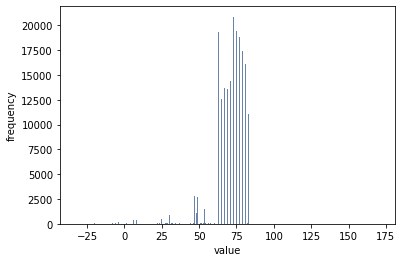

<Figure size 576x432 with 0 Axes>

In [91]:
thinkplot.Hist(temp_hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

In [33]:
temp.mean()

61.503567771204374

In [34]:
temp.std()

19.233740137254276

In [35]:
temp.var()

369.9367596674261

In [36]:
severity = df['Severity']#.dropna()

In [37]:
sev_hist = thinkstats2.Hist(severity)
print(sev_hist)

Hist({2: 641198, 3: 220627, 4: 25633, 1: 183})


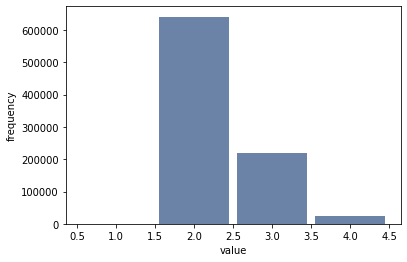

<Figure size 576x432 with 0 Axes>

In [38]:
thinkplot.Hist(sev_hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

In [39]:
# Split it in to to sets by severity
severe = df[df.Severity > 2]
non_severe = df[df.Severity <3]

In [40]:
severe_pmf = thinkstats2.Pmf(severe['Wind_Speed(mph)'])
print(severe_pmf)

Pmf({0.0: 0.12227320717940388, 6.0: 0.07604564281653536, 5.0: 0.07566393242913994, 7.0: 0.07211077722732072, 3.0: 0.07153415089742549, 8.0: 0.0663039064403476, 9.0: 0.05798343214488751, 10.0: 0.0487371071225534, 12.0: 0.04193941362787298, 13.0: 0.031174368553561278, 15.0: 0.027227320717940387, 5.8: 0.026792820596117924, 4.6: 0.026346138227889223, 14.0: 0.025875091366848044, 3.5: 0.024742142451067976, 6.9: 0.024417282546901647, 8.1: 0.022853894258101193, 9.2: 0.020218468285551856, 10.4: 0.0166734345813368, 11.5: 0.01571103711524405, 16.0: 0.014009583367172906, 12.7: 0.012685779257695118, 17.0: 0.010935596523999025, 13.8: 0.010411759928530821, 18.0: 0.0079671891496792, 16.1: 0.006740843011451311, 20.0: 0.005676926825306587, 17.3: 0.0052911556891090715, 18.4: 0.004361244213432957, 21.0: 0.0040038983188499955, 23.0: 0.003191748558434175, 19.6: 0.0031308373264029884, 22.0: 0.003061804596767644, 20.7: 0.0026638512141638915, 21.9: 0.0019978884106229187, 24.0: 0.0015146593031755055, 25.0: 0.00

In [41]:
non_severe_pmf = thinkstats2.Pmf(non_severe['Wind_Speed(mph)'])
print(non_severe_pmf)

Pmf({0.0: 0.15840974397433039, 5.0: 0.08788847814325651, 3.0: 0.08663181478715459, 6.0: 0.08257806202553553, 7.0: 0.07573345640110948, 8.0: 0.06533402143187902, 9.0: 0.05699264555700902, 10.0: 0.04550649302052914, 12.0: 0.039177961305370754, 13.0: 0.02941153542122389, 15.0: 0.023340261092860564, 14.0: 0.02282262804791536, 4.6: 0.021869996148934878, 5.8: 0.021185535586492273, 3.5: 0.020613332792832968, 6.9: 0.019550002260746734, 8.1: 0.018176403728828887, 9.2: 0.015834581941155102, 16.0: 0.013014105500474757, 10.4: 0.012903406867369006, 11.5: 0.011575023270099988, 17.0: 0.009813199954473238, 12.7: 0.008961911874533234, 13.8: 0.007638205684296854, 18.0: 0.007126809182061832, 20.0: 0.005238695876553874, 16.1: 0.004585418027662186, 17.3: 0.003886925244121669, 21.0: 0.003617194771906246, 18.4: 0.0028999923602351803, 22.0: 0.002809562490937524, 23.0: 0.002795530269839612, 19.6: 0.002190585626951843, 20.7: 0.0017275223307207418, 21.9: 0.0013049965621058312, 24.0: 0.0012925234766854648, 25.0: 

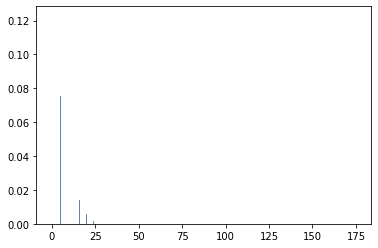

In [42]:
thinkplot.Hist(severe_pmf)

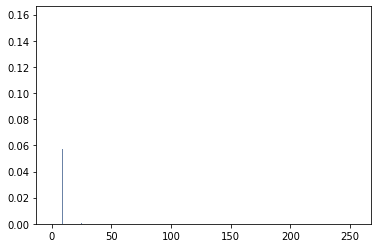

In [43]:
thinkplot.Hist(non_severe_pmf)

In [44]:
severe_cdf = thinkstats2.Cdf(severe_pmf, label='Severe')

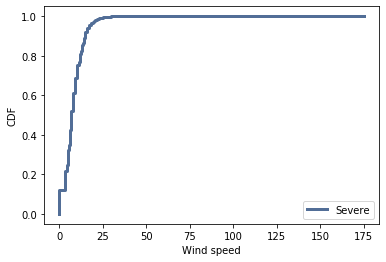

<Figure size 576x432 with 0 Axes>

In [45]:
thinkplot.Cdf(severe_cdf)
thinkplot.Show(xlabel="Wind speed", ylabel='CDF')

In [46]:
non_severe_cdf = thinkstats2.Cdf(non_severe_pmf, label='Non Severe')

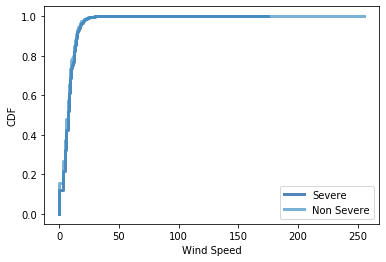

<Figure size 576x432 with 0 Axes>

In [47]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([severe_cdf, non_severe_cdf])
thinkplot.Show(xlabel='Wind Speed', ylabel='CDF')

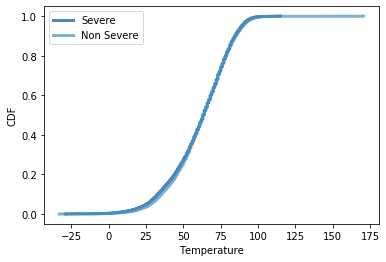

<Figure size 576x432 with 0 Axes>

In [48]:
severe_pmf = thinkstats2.Pmf(severe['Temperature(F)'])
non_severe_pmf = thinkstats2.Pmf(non_severe['Temperature(F)'])
severe_cdf = thinkstats2.Cdf(severe_pmf, label='Severe')
non_severe_cdf = thinkstats2.Cdf(non_severe_pmf, label='Non Severe')
thinkplot.PrePlot(2)
thinkplot.Cdfs([severe_cdf, non_severe_cdf])
thinkplot.Show(xlabel='Temperature', ylabel='CDF')

In [49]:
sample = thinkstats2.SampleRows(df, 5000)
severity, windspeed, temperature, visibility,weather2 = sample['Severity'], sample['Wind_Speed(mph)'], sample['Temperature(F)'],sample['Visibility(mi)'],sample['Weather2']

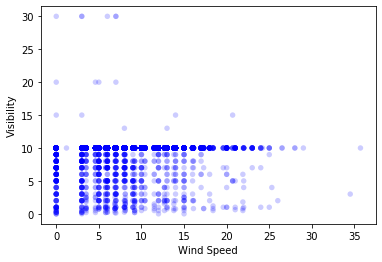

<Figure size 576x432 with 0 Axes>

In [50]:
thinkplot.Scatter(windspeed, visibility)
thinkplot.Show(xlabel='Wind Speed',ylabel='Visibility')

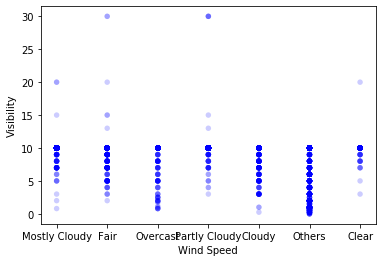

<Figure size 576x432 with 0 Axes>

In [51]:
#len(weather2)
#len (visibility)
thinkplot.Scatter(weather2, visibility)
thinkplot.Show(xlabel='Wind Speed',ylabel='Visibility')

In [52]:
# A function to calculate Covariance
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

# A function to calculate Pearson's correlation
def PearsonCorr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

# A function to calculate Spearman's correlation
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return PearsonCorr(xranks, yranks)

In [53]:
Cov(windspeed,visibility)

0.12112308999999982

In [54]:
PearsonCorr(windspeed,visibility)

0.009653579365185959

In [55]:
SpearmanCorr(windspeed,visibility)

0.05911255438654067

In [56]:
Cov(temperature,visibility)

10.2832500586

In [57]:
PearsonCorr(temperature,visibility)

0.2174959014674928

In [58]:
SpearmanCorr(windspeed,visibility)

0.05911255438654067

In [59]:
class AccidentTest(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
        
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [63]:
data = severe['Visibility(mi)'].values, non_severe['Visibility(mi)'].values
ht = AccidentTest(data)
ht.PValue()

0.037

In [64]:
data = severe['Wind_Speed(mph)'].values, non_severe['Wind_Speed(mph)'].values
ht = AccidentTest(data)
ht.PValue()

0.0

In [86]:
import random

class SignalTest(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        signal, no_signal = data
        test_stat = abs(signal - no_signal)
        return test_stat
    def RunModel(self):
        signal, no_signal = self.data
        n = signal + no_signal
        sample = [random.choice('YN') for _ in range(n)]
        hist = thinkstats2.Hist(sample)
        data = hist['Y'], hist['N']
        return data

In [87]:
yes_signal = len(signal == True)
no_signal = len(signal == True)
ct = SignalTest((yes_signal, no_signal))
pvalue = ct.PValue()

KeyboardInterrupt: 

In [125]:
import statsmodels.formula.api as smf

In [130]:
formula = 'Severity ~ visibility'

model = smf.ols(formula, data=df)
results = model.fit()

In [131]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Severity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.818
Date:                Tue, 26 May 2020   Prob (F-statistic):              0.178
Time:                        21:38:53   Log-Likelihood:            -6.7934e+05
No. Observations:              887641   AIC:                         1.359e+06
Df Residuals:                  887639   BIC:                         1.359e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3085      0.002   1236.773      0.0